In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium


# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [3]:
budget_data = pd.read_csv('Data\Budget_by_Command.csv')

In [6]:
budget_data['Category'].unique()

array(['Equipment', 'Salaries', 'Materials & Supplies', 'Services',
       'Benefits', 'Premium Pay', 'Revenues'], dtype=object)

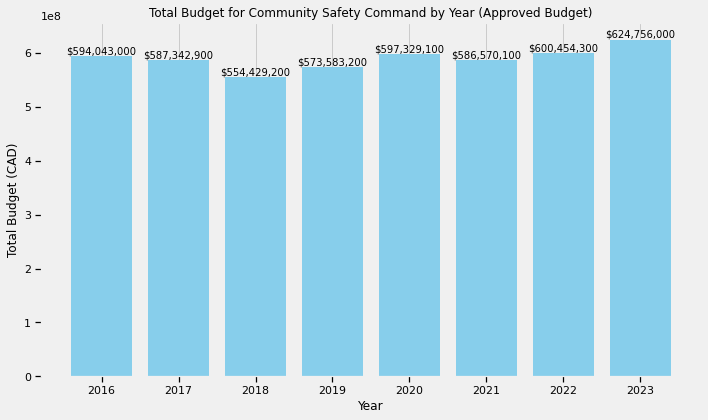

In [7]:
#filter the df to only include the Community Safety Command and only Actual Expenditures. This ensures that we have accurate budget values
community_safety_budget = budget_data[
    (budget_data['Command'] == 'Community Safety Command') &
    (budget_data['Type of Metric'] == 'Approved Budget')] #ensures that only approved budget is being accounted for

#this list only includes everything but the revenue from the category of budget. Revenue has been excluded as it does not count as the budget.
positive_categories = ['Equipment', 'Salaries', 'Materials & Supplies', 'Services',
                       'Benefits', 'Premium Pay']


community_safety_budget = community_safety_budget[community_safety_budget['Category'].isin(positive_categories)]

#to get total approved budget by year
total_budget_per_year = community_safety_budget.groupby('Year')['Amount'].sum().reset_index()


plt.figure(figsize=(10, 6))
plt.bar(total_budget_per_year['Year'], total_budget_per_year['Amount'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Budget (CAD)')
plt.title('Total Budget for Community Safety Command by Year (Approved Budget)')
plt.xticks(total_budget_per_year['Year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

#annotate the budget for each year on top of the bar
for x in range(len(total_budget_per_year)):
    plt.text(total_budget_per_year['Year'][x], total_budget_per_year['Amount'][x] + 100000,  #ensure the text is vertically placed on top
             f"${total_budget_per_year['Amount'][x]:,.0f}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


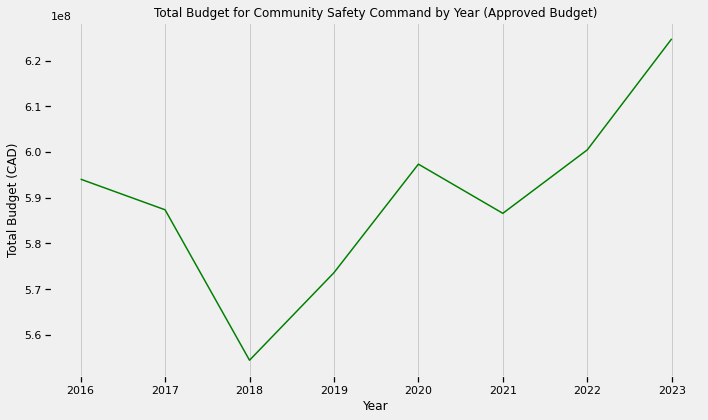

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = total_budget_per_year['Year'], y = total_budget_per_year['Amount'],data=total_budget_per_year, color='green')
plt.xlabel('Year')
plt.ylabel('Total Budget (CAD)')
plt.title('Total Budget for Community Safety Command by Year (Approved Budget)')
plt.xticks(total_budget_per_year['Year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()
